In [ ]:
#لين عمر عبدالله ال عيون 202420244

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Exploring the Data

In [ ]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


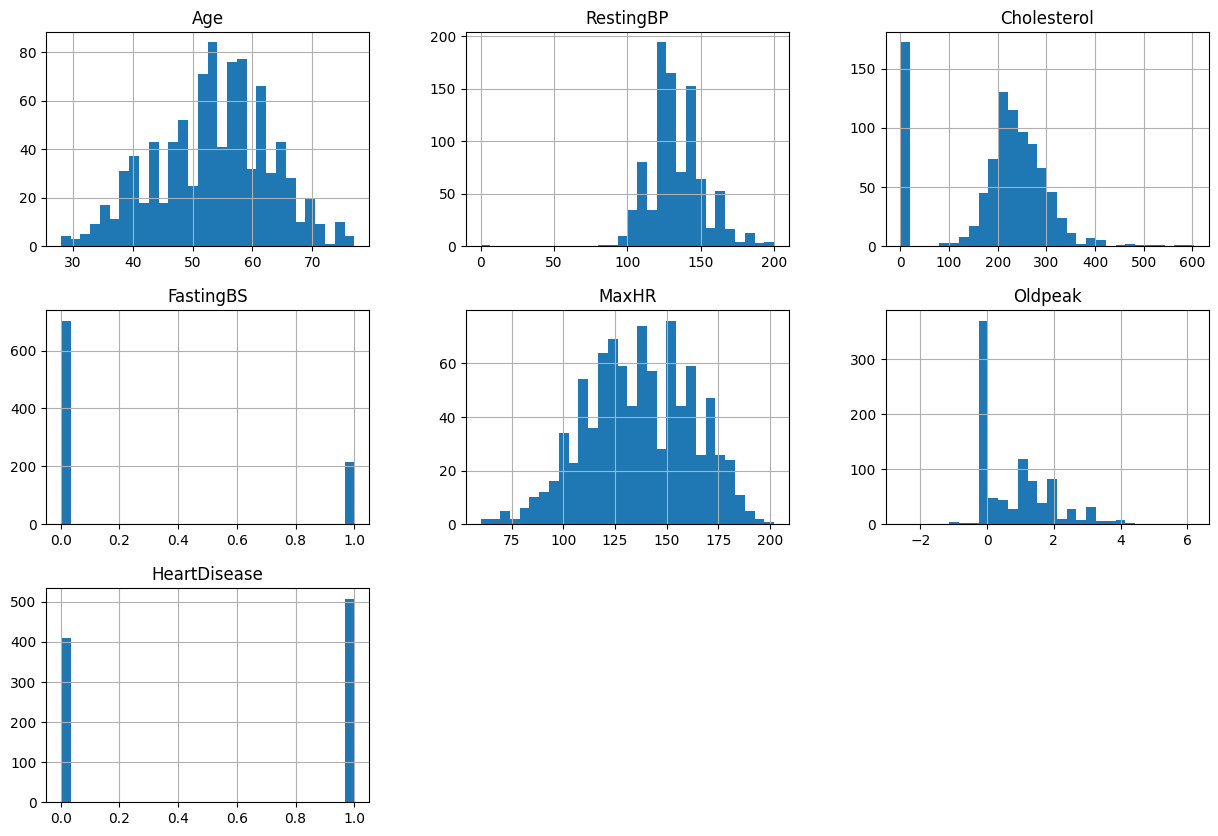

In [ ]:
data.hist(bins=30, figsize=(15,10))
plt.show()

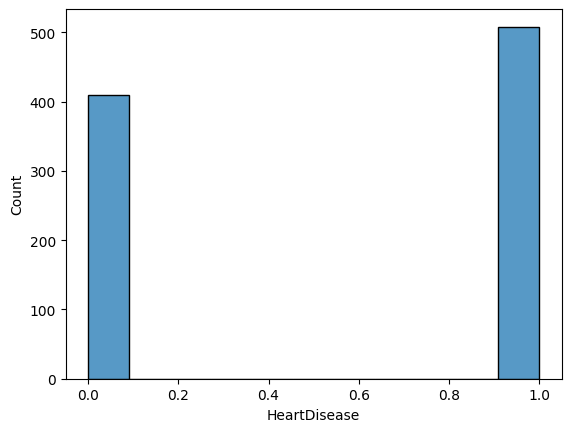

In [ ]:
sns.histplot(data['HeartDisease'])
plt.show()

In [ ]:
print(list(data['HeartDisease']).count(1))
print(list(data['HeartDisease']).count(0))

508
410


# Data Preprocessing

## checking for nulls and duplicates

In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
data.duplicated()
if data.duplicated().any() == True:
    print('there is a duplicate')
else:
    print('no duplicates')

no duplicates


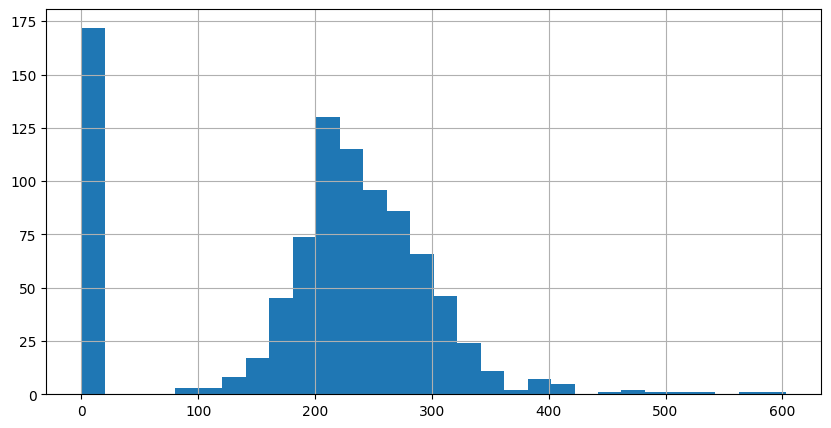

In [ ]:
data['Cholesterol'].hist(bins=30, figsize=(10,5))
plt.show()

In [ ]:
data.Cholesterol.value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [ ]:
data.loc[data['Cholesterol'] == 0.0, "Cholesterol"] = np.nan
data.loc[data['RestingBP'] == 0.0, "RestingBP"] = np.nan

In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,1
Cholesterol,172
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
data.dropna(subset=['RestingBP'], inplace=True)

In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,171
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


## Encoding categorical features

In [ ]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
data['Sex']
data['Sex']= data['Sex'].map({'M':0,'F':1})
data['ExerciseAngina']= data['ExerciseAngina'].map({'Y':1,'N':0})

In [ ]:
data['ExerciseAngina'].unique()


array([0, 1])

In [ ]:
data['Sex'].unique()

array([0, 1])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int64  
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    int64  
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 93.1+ KB


In [ ]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
chestPain = pd.get_dummies(data['ChestPainType'])
data = pd.concat([data.drop('ChestPainType', axis=1), chestPain], axis=1)

In [ ]:
data.columns
data = data.loc[:,['Age','Sex','ASY','ATA','NAP','TA','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']]
data

,Age,Sex,ASY,ATA,NAP,TA,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,False,True,False,False,140.0,289.0,0,Normal,172,0,0.0,Up,0
1,49,1,False,False,True,False,160.0,180.0,0,Normal,156,0,1.0,Flat,1
2,37,0,False,True,False,False,130.0,283.0,0,ST,98,0,0.0,Up,0
3,48,1,True,False,False,False,138.0,214.0,0,Normal,108,1,1.5,Flat,1
4,54,0,False,False,True,False,150.0,195.0,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,False,False,False,True,110.0,264.0,0,Normal,132,0,1.2,Flat,1
914,68,0,True,False,False,False,144.0,193.0,1,Normal,141,0,3.4,Flat,1
915,57,0,True,False,False,False,130.0,131.0,0,Normal,115,1,1.2,Flat,1
916,57,1,False,True,False,False,130.0,236.0,0,LVH,174,0,0.0,Flat,1


In [ ]:
print(data.dtypes[2:6])

ASY    bool
ATA    bool
NAP    bool
TA     bool
dtype: object


In [ ]:
data['ASY'] = data['ASY'].map({True: 1, False: 0})
data['ATA'] = data['ATA'].map({True: 1, False: 0})
data['NAP'] = data['NAP'].map({True: 1, False: 0})
data['TA'] = data['TA'].map({True: 1, False: 0})

In [ ]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
restingEcg = pd.get_dummies(data['RestingECG'])
data = pd.concat([data.drop('RestingECG', axis=1), restingEcg], axis=1)

In [ ]:
data.columns
data = data.loc[:,['Age','Sex','ASY','ATA','NAP','TA','RestingBP','Cholesterol','FastingBS','LVH','Normal','ST','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']]

In [ ]:
data['LVH'] = data['LVH'].map({True: 1, False: 0})
data['Normal'] = data['Normal'].map({True: 1, False: 0})
data['ST'] = data['ST'].map({True: 1, False: 0})

In [ ]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
data['ST_Slope'] = data['ST_Slope'].map({'Up':2,'Flat':1,'Down':0})

In [ ]:
data['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [ ]:
data['Oldpeak']=data['Oldpeak'].abs()

In [ ]:
data['Oldpeak'].unique()

array([0. , 1. , 1.5, 2. , 3. , 4. , 0.5, 2.5, 5. , 0.8, 0.7, 1.4, 2.1,
       0.4, 0.2, 1.7, 2.2, 0.1, 1.6, 1.3, 0.3, 1.8, 2.6, 0.9, 2.8, 1.1,
       2.4, 3.7, 1.2, 1.9, 3.5, 0.6, 3.1, 2.3, 3.4, 3.6, 4.2, 3.2, 5.6,
       3.8, 2.9, 6.2, 4.4])

In [ ]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int64  
 2   ASY             917 non-null    int64  
 3   ATA             917 non-null    int64  
 4   NAP             917 non-null    int64  
 5   TA              917 non-null    int64  
 6   RestingBP       917 non-null    float64
 7   Cholesterol     746 non-null    float64
 8   FastingBS       917 non-null    int64  
 9   LVH             917 non-null    int64  
 10  Normal          917 non-null    int64  
 11  ST              917 non-null    int64  
 12  MaxHR           917 non-null    int64  
 13  ExerciseAngina  917 non-null    int64  
 14  Oldpeak         917 non-null    float64
 15  ST_Slope        917 non-null    int64  
 16  HeartDisease    917 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 1

,Age,Sex,ASY,ATA,NAP,TA,RestingBP,Cholesterol,FastingBS,LVH,Normal,ST,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,1,0,0,140.0,289.0,0,0,1,0,172,0,0.0,2,0
1,49,1,0,0,1,0,160.0,180.0,0,0,1,0,156,0,1.0,1,1
2,37,0,0,1,0,0,130.0,283.0,0,0,0,1,98,0,0.0,2,0
3,48,1,1,0,0,0,138.0,214.0,0,0,1,0,108,1,1.5,1,1
4,54,0,0,0,1,0,150.0,195.0,0,0,1,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,0,0,1,110.0,264.0,0,0,1,0,132,0,1.2,1,1
914,68,0,1,0,0,0,144.0,193.0,1,0,1,0,141,0,3.4,1,1
915,57,0,1,0,0,0,130.0,131.0,0,0,1,0,115,1,1.2,1,1
916,57,1,0,1,0,0,130.0,236.0,0,1,0,0,174,0,0.0,1,1


## imputation of cholestrol missing values using LGBMRegressor

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
data_copy = data.copy()
nan_chol_ind = np.where(data_copy['Cholesterol'].isna())[0]
nan_chol = data_copy.index[nan_chol_ind]
data['is_nan']= 0
data.loc[nan_chol, 'is_nan'] = 1
data

,Age,Sex,ASY,ATA,NAP,TA,RestingBP,Cholesterol,FastingBS,LVH,Normal,ST,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,is_nan
0,40,0,0,1,0,0,140.0,289.0,0,0,1,0,172,0,0.0,2,0,0
1,49,1,0,0,1,0,160.0,180.0,0,0,1,0,156,0,1.0,1,1,0
2,37,0,0,1,0,0,130.0,283.0,0,0,0,1,98,0,0.0,2,0,0
3,48,1,1,0,0,0,138.0,214.0,0,0,1,0,108,1,1.5,1,1,0
4,54,0,0,0,1,0,150.0,195.0,0,0,1,0,122,0,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,0,0,1,110.0,264.0,0,0,1,0,132,0,1.2,1,1,0
914,68,0,1,0,0,0,144.0,193.0,1,0,1,0,141,0,3.4,1,1,0
915,57,0,1,0,0,0,130.0,131.0,0,0,1,0,115,1,1.2,1,1,0
916,57,1,0,1,0,0,130.0,236.0,0,1,0,0,174,0,0.0,1,1,0


In [ ]:
train = data[data['is_nan']==0]
test = data[data['is_nan']==1]
print(test['Cholesterol'])
print(train['Cholesterol'])

293   NaN
294   NaN
295   NaN
296   NaN
297   NaN
       ..
514   NaN
515   NaN
518   NaN
535   NaN
536   NaN
Name: Cholesterol, Length: 171, dtype: float64
0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 746, dtype: float64


In [ ]:
x_train_impute = train.drop(['Cholesterol','is_nan'],axis=1)
y_train_impute = train['Cholesterol']
x_test_impute = test.drop(['Cholesterol','is_nan'],axis=1)
y_test_impute = test['Cholesterol']

model = LGBMRegressor()
model.fit(x_train_impute,y_train_impute)
y_pred = model.predict(x_test_impute)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 746, number of used features: 16
[LightGBM] [Info] Start training from score 244.635389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
y_pred

array([274.59711625, 289.86223502, 225.66505143, 277.90229319,
       241.88430451, 236.45130896, 212.34481353, 236.79247433,
       230.65481005, 247.34425665, 281.91382294, 218.16613481,
       269.14580493, 305.91842748, 238.8606427 , 272.73224298,
       252.27904364, 268.58079851, 219.23976546, 251.59802877,
       320.39699561, 219.05723579, 206.26729374, 257.11320523,
       276.9941289 , 253.74132772, 225.92461704, 236.43279692,
       264.5758068 , 199.28055616, 289.09484265, 207.45141897,
       233.21234565, 200.35626159, 239.14101376, 261.79985306,
       243.57957407, 270.76703945, 261.74124549, 217.80088169,
       245.10729979, 264.40331603, 239.9579362 , 245.00180539,
       240.60195053, 258.225118  , 248.44630704, 244.58286434,
       256.85433938, 218.8784245 , 271.00984034, 247.54952632,
       203.83673592, 165.45589208, 341.43692358, 206.98569363,
       319.57136992, 262.55465231, 277.7293042 , 252.99679375,
       236.45894234, 200.73469814, 261.77940066, 241.50

In [ ]:
data.loc[nan_chol,'Cholesterol'] = y_pred

In [ ]:
data['Cholesterol'].isnull().sum()

np.int64(0)

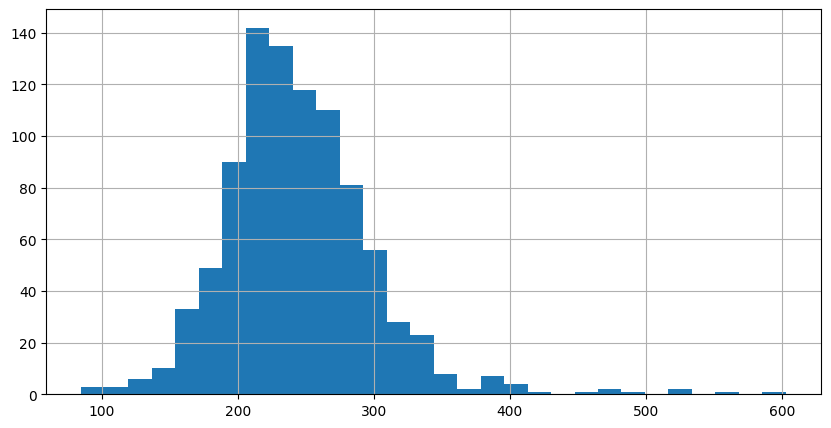

In [ ]:
data['Cholesterol'].hist(bins=30, figsize=(10,5))
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int64  
 2   ASY             917 non-null    int64  
 3   ATA             917 non-null    int64  
 4   NAP             917 non-null    int64  
 5   TA              917 non-null    int64  
 6   RestingBP       917 non-null    float64
 7   Cholesterol     917 non-null    float64
 8   FastingBS       917 non-null    int64  
 9   LVH             917 non-null    int64  
 10  Normal          917 non-null    int64  
 11  ST              917 non-null    int64  
 12  MaxHR           917 non-null    int64  
 13  ExerciseAngina  917 non-null    int64  
 14  Oldpeak         917 non-null    float64
 15  ST_Slope        917 non-null    int64  
 16  HeartDisease    917 non-null    int64  
 17  is_nan          917 non-null    int64  


dropping the is_nan column becasue it was used only for the imputation of Cholesterol

In [ ]:
data.drop('is_nan',axis=1,inplace=True)
data

,Age,Sex,ASY,ATA,NAP,TA,RestingBP,Cholesterol,FastingBS,LVH,Normal,ST,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,1,0,0,140.0,289.0,0,0,1,0,172,0,0.0,2,0
1,49,1,0,0,1,0,160.0,180.0,0,0,1,0,156,0,1.0,1,1
2,37,0,0,1,0,0,130.0,283.0,0,0,0,1,98,0,0.0,2,0
3,48,1,1,0,0,0,138.0,214.0,0,0,1,0,108,1,1.5,1,1
4,54,0,0,0,1,0,150.0,195.0,0,0,1,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,0,0,1,110.0,264.0,0,0,1,0,132,0,1.2,1,1
914,68,0,1,0,0,0,144.0,193.0,1,0,1,0,141,0,3.4,1,1
915,57,0,1,0,0,0,130.0,131.0,0,0,1,0,115,1,1.2,1,1
916,57,1,0,1,0,0,130.0,236.0,0,1,0,0,174,0,0.0,1,1


In [ ]:
features = data.iloc[:,:-1]
print(features)
y = data.iloc[:,-1]
print(y)

     Age  Sex  ASY  ATA  NAP  TA  RestingBP  Cholesterol  FastingBS  LVH  \
0     40    0    0    1    0   0      140.0        289.0          0    0   
1     49    1    0    0    1   0      160.0        180.0          0    0   
2     37    0    0    1    0   0      130.0        283.0          0    0   
3     48    1    1    0    0   0      138.0        214.0          0    0   
4     54    0    0    0    1   0      150.0        195.0          0    0   
..   ...  ...  ...  ...  ...  ..        ...          ...        ...  ...   
913   45    0    0    0    0   1      110.0        264.0          0    0   
914   68    0    1    0    0   0      144.0        193.0          1    0   
915   57    0    1    0    0   0      130.0        131.0          0    0   
916   57    1    0    1    0   0      130.0        236.0          0    1   
917   38    0    0    0    1   0      138.0        175.0          0    0   

     Normal  ST  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0         1   0    172     

## Data Splitting and Normalization using MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Feature Selection, Models and Evaluation

## Univariate FS: SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selector1 = SelectKBest(chi2, k=10)
x_train_kBest = selector1.fit_transform(x_train, y_train)
x_test_kBest = selector1.transform(x_test)
output1 = pd.DataFrame(x_train_kBest)
output1.columns = features.columns[selector1.get_support()]
print(selector1.get_support())
print(output1)

[False  True  True  True  True False False False  True False False  True
  True  True  True  True]
     Sex  ASY  ATA  NAP  FastingBS   ST     MaxHR  ExerciseAngina   Oldpeak  \
0    0.0  0.0  0.0  1.0        1.0  0.0  0.943662             0.0  0.129032   
1    0.0  0.0  0.0  1.0        0.0  0.0  0.830986             0.0  0.000000   
2    0.0  1.0  0.0  0.0        1.0  0.0  0.457746             1.0  0.161290   
3    1.0  0.0  0.0  1.0        0.0  0.0  0.577465             0.0  0.000000   
4    0.0  1.0  0.0  0.0        1.0  0.0  0.309859             0.0  0.000000   
..   ...  ...  ...  ...        ...  ...       ...             ...       ...   
728  1.0  1.0  0.0  0.0        0.0  1.0  0.352113             0.0  0.000000   
729  0.0  1.0  0.0  0.0        0.0  0.0  0.563380             0.0  0.000000   
730  0.0  1.0  0.0  0.0        0.0  0.0  0.690141             0.0  0.096774   
731  0.0  1.0  0.0  0.0        0.0  1.0  0.408451             1.0  0.000000   
732  1.0  1.0  0.0  0.0        0

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_kbest_smote, y_train_kbest_smote = smote.fit_resample(x_train_kBest, y_train)
print("Original count of kbest training data: ",len(x_train_kBest))
print("class 1 values of original kbest training data: ",list(y_train).count(1))
print("class 0 values of original kbest training data: ",list(y_train).count(0))
print("Oversampled count of kbest training data: ",len(x_train_kbest_smote))
print("class 1 values of oversampled kbest training data: ",list(y_train_kbest_smote).count(1))
print("class 0 values of oversampled kbest training data: ",list(y_train_kbest_smote).count(0))
print("Original Kbest training shape:", x_train_kBest.shape)
print("Oversampled training shape:", x_train_kbest_smote.shape)

Original count of kbest training data:  733
class 1 values of original kbest training data:  395
class 0 values of original kbest training data:  338
Oversampled count of kbest training data:  790
class 1 values of oversampled kbest training data:  395
class 0 values of oversampled kbest training data:  395
Original Kbest training shape: (733, 10)
Oversampled training shape: (790, 10)


### FS: selectKBest, Model: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score

In [ ]:
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(x_train_kbest_smote, y_train_kbest_smote)
y_pred_kbest_logisticR = logisticRegression.predict(x_test_kBest)
print("Accuracy: ",accuracy_score(y_test, y_pred_kbest_logisticR))
print("Precision: ",precision_score(y_test, y_pred_kbest_logisticR))
print("Recall (Sensitivity): ",recall_score(y_test, y_pred_kbest_logisticR))
print("F1 Score: ",f1_score(y_test, y_pred_kbest_logisticR))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_kbest_logisticR))

Accuracy:  0.8478260869565217
Precision:  0.8962264150943396
Recall (Sensitivity):  0.8482142857142857
F1 Score:  0.8715596330275229
Confusion Matrix: 
[[61 11]
 [17 95]]


### FS: selectKBest, Model: Support Vector Machine

In [ ]:
svm = SVC(random_state=42)
svm.fit(x_train_kbest_smote, y_train_kbest_smote)
y_pred_kbest_svm = svm.predict(x_test_kBest)
print("Accuracy: ",accuracy_score(y_test, y_pred_kbest_svm))
print("Precision: ",precision_score(y_test, y_pred_kbest_svm))
print("Recall (Sensitivity): ",recall_score(y_test, y_pred_kbest_svm))
print("F1 Score: ",f1_score(y_test, y_pred_kbest_svm))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_kbest_svm))

Accuracy:  0.8532608695652174
Precision:  0.9047619047619048
Recall (Sensitivity):  0.8482142857142857
F1 Score:  0.8755760368663594
Confusion Matrix: 
[[62 10]
 [17 95]]


### FS: selectKBest, Model: XGBoost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators = 150, max_depth = 3, learning_rate=0.1, random_state = 42)
xgb_model.fit(x_train_kbest_smote, y_train_kbest_smote)
y_pred_kbest_xgb = xgb_model.predict(x_test_kBest)
print("Accuracy: ",accuracy_score(y_test, y_pred_kbest_xgb))
print("Precision: ",precision_score(y_test, y_pred_kbest_xgb))
print("Recall (Sensitivity): ",recall_score(y_test, y_pred_kbest_xgb))
print("F1 Score: ",f1_score(y_test, y_pred_kbest_xgb))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_kbest_xgb))

Accuracy:  0.8532608695652174
Precision:  0.8899082568807339
Recall (Sensitivity):  0.8660714285714286
F1 Score:  0.8778280542986425
Confusion Matrix: 
[[60 12]
 [15 97]]


### FS: selectKBest, Model: Multi-layer Perceptron

In [ ]:
mlp = MLPClassifier(max_iter=10000, random_state=42)
mlp.fit(x_train_kbest_smote, y_train_kbest_smote)
y_pred_kbest_mlp = mlp.predict(x_test_kBest)
print("Accuracy: ",accuracy_score(y_test, y_pred_kbest_mlp))
print("Precision: ",precision_score(y_test, y_pred_kbest_mlp))
print("Recall (Sensitivity): ",recall_score(y_test, y_pred_kbest_mlp))
print("F1 Score: ",f1_score(y_test, y_pred_kbest_mlp))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_kbest_mlp))

Accuracy:  0.8478260869565217
Precision:  0.8888888888888888
Recall (Sensitivity):  0.8571428571428571
F1 Score:  0.8727272727272727
Confusion Matrix: 
[[60 12]
 [16 96]]


## Wrapper FS: RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
selector2 = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=10)
x_train_rfe = selector2.fit_transform(x_train, y_train)
x_test_rfe = selector2.transform(x_test)
print(selector2.get_support())
mask = selector2.get_support()
selected_features = features.columns[mask]
print("Selected features:",list(selected_features))

[ True  True  True False False False  True  True  True  True False False
  True False  True  True]
Selected features: ['Age', 'Sex', 'ASY', 'RestingBP', 'Cholesterol', 'FastingBS', 'LVH', 'MaxHR', 'Oldpeak', 'ST_Slope']


In [ ]:
smote = SMOTE(random_state=42)
x_train_rfe_smote, y_train_rfe_smote = smote.fit_resample(x_train_rfe, y_train)
print("Original count of RFE training data",len(x_train_rfe))
print("class 1 values of original RFE training data: ",list(y_train).count(1))
print("class 0 values of original RFE training data: ",list(y_train).count(0))
print("Oversampled count of RFE training data: ",len(x_train_rfe_smote))
print("class 1 values of oversampled RFE training data: ",list(y_train_rfe_smote).count(1))
print("class 0 values of oversampled RFE training data: ",list(y_train_rfe_smote).count(0))
print("Original RFE training shape:", x_train_rfe.shape)
print("Oversampled training shape:", x_train_rfe_smote.shape)

Original count of RFE training data 733
class 1 values of original RFE training data:  395
class 0 values of original RFE training data:  338
Oversampled count of RFE training data:  790
class 1 values of oversampled RFE training data:  395
class 0 values of oversampled RFE training data:  395
Original RFE training shape: (733, 10)
Oversampled training shape: (790, 10)


### FS: RFE, Model: Logistic Regression


In [ ]:
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(x_train_rfe_smote, y_train_rfe_smote)
y_pred_rfe_logisticR = logisticRegression.predict(x_test_rfe)
print("Accuracy: ",accuracy_score(y_test, y_pred_rfe_logisticR))
print("Precision: ",precision_score(y_test, y_pred_rfe_logisticR))
print("Recall (Sensitivity): ",recall_score(y_test, y_pred_rfe_logisticR))
print("F1 Score: ",f1_score(y_test, y_pred_rfe_logisticR))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_rfe_logisticR))

Accuracy:  0.8532608695652174
Precision:  0.9047619047619048
Recall (Sensitivity):  0.8482142857142857
F1 Score:  0.8755760368663594
Confusion Matrix: 
[[62 10]
 [17 95]]


### FS: RFE, Model: Support Vector Machine

In [ ]:
svm = SVC(random_state=42)
svm.fit(x_train_rfe_smote, y_train_rfe_smote)
y_pred_rfe_svm = svm.predict(x_test_rfe)
print("Accuracy: ",accuracy_score(y_test, y_pred_rfe_svm))
print("Precision: ",precision_score(y_test, y_pred_rfe_svm))
print("Recall (Sensitivity): ",recall_score(y_test, y_pred_rfe_svm))
print("F1 Score: ",f1_score(y_test, y_pred_rfe_svm))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_rfe_svm))

Accuracy:  0.8586956521739131
Precision:  0.9056603773584906
Recall (Sensitivity):  0.8571428571428571
F1 Score:  0.8807339449541285
Confusion Matrix: 
[[62 10]
 [16 96]]


### FS: RFE, Model: XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators = 150, max_depth = 3, learning_rate=0.1, random_state =42)
xgb_model.fit(x_train_rfe_smote, y_train_rfe_smote)
y_pred_rfe_xgb = xgb_model.predict(x_test_rfe)
print("Accuracy: ",accuracy_score(y_test, y_pred_rfe_xgb))
print("Precision: ",precision_score(y_test, y_pred_rfe_xgb))
print("Recall (Sensitivity): ",recall_score(y_test, y_pred_rfe_xgb))
print("F1 Score: ",f1_score(y_test, y_pred_rfe_xgb))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_rfe_xgb))

Accuracy:  0.8641304347826086
Precision:  0.9142857142857143
Recall (Sensitivity):  0.8571428571428571
F1 Score:  0.8847926267281107
Confusion Matrix: 
[[63  9]
 [16 96]]


### FS: RFE, Model: Multi-Layer Perceptron

In [ ]:
mlp = MLPClassifier(max_iter=10000, random_state=42)
mlp.fit(x_train_rfe_smote, y_train_rfe_smote)
y_pred_rfe_mlp = mlp.predict(x_test_rfe)
print("Accuracy: ",accuracy_score(y_test, y_pred_rfe_mlp))
print("Precision: ",precision_score(y_test, y_pred_rfe_mlp))
print("Recall (Sensitivity): ",recall_score(y_test, y_pred_rfe_mlp))
print("F1 Score: ",f1_score(y_test, y_pred_rfe_mlp))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_rfe_mlp))

Accuracy:  0.875
Precision:  0.9009009009009009
Recall (Sensitivity):  0.8928571428571429
F1 Score:  0.8968609865470852
Confusion Matrix: 
[[ 61  11]
 [ 12 100]]


# Final Model Evaluations and Comparison

## best performing models comparison using classification report confusion matrix heatmap and ROC Curve

classification report for XGBoost (Kbest FS): 
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        72
           1       0.89      0.87      0.88       112

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



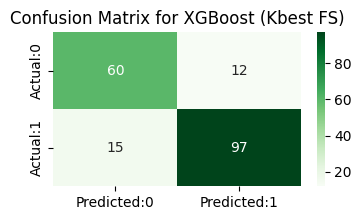

In [ ]:
classification_report_kbest_xgb = classification_report(y_test, y_pred_kbest_xgb)
print("classification report for XGBoost (Kbest FS): ")
print(classification_report_kbest_xgb)
conf_kbest_xgb = confusion_matrix(y_test, y_pred_kbest_xgb)
conf_m_kbest_xgb= pd.DataFrame(data = conf_kbest_xgb,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (4, 2))
sns.heatmap(conf_m_kbest_xgb, annot = True, fmt = 'd', cmap = "Greens")
plt.title('Confusion Matrix for XGBoost (Kbest FS)')
plt.show()

classification report for MLP (RFE FS): 
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        72
           1       0.90      0.89      0.90       112

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



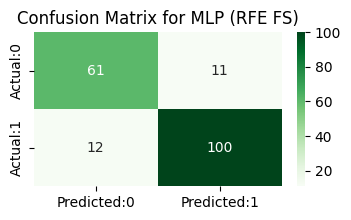

In [ ]:
classification_report_rfe_mlp = classification_report(y_test, y_pred_rfe_mlp)
print("classification report for MLP (RFE FS): ")
print(classification_report_rfe_mlp)
conf_rfe_mlp = confusion_matrix(y_test, y_pred_rfe_mlp)
conf_m_rfe_mlp= pd.DataFrame(data = conf_rfe_mlp,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (4, 2))
sns.heatmap(conf_m_rfe_mlp, annot = True, fmt = 'd', cmap = "Greens")
plt.title('Confusion Matrix for MLP (RFE FS)')
plt.show()

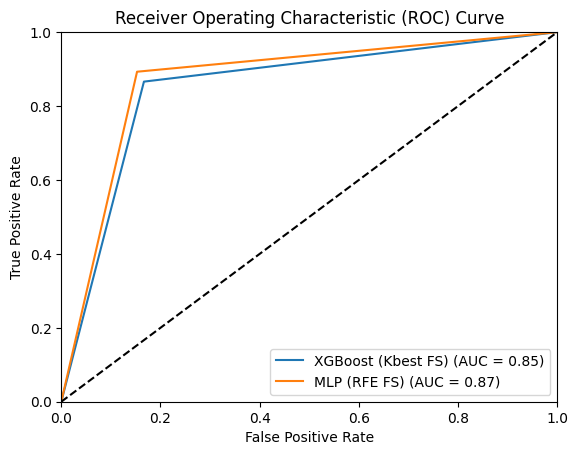

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_kbest_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_rfe_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (Kbest FS) (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (RFE FS) (AUC = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Result: overall best performing model is MLP